NNopt Optimizing Function
---

In [1]:
import numpy as np
def black_box_function(a):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
    return a * np.sin(a)


In [2]:
from nnopt.nnopt import Optimizer

Nopt = Optimizer(black_box_function, 
                 N=1, 
                 surrogate_hidden_layer=1000, 
                 model_hidden_layer=400, 
                 memory_hidden_layer=400,
                 mem_model_out=40,
                 Rn=[(-10, 10)]) 


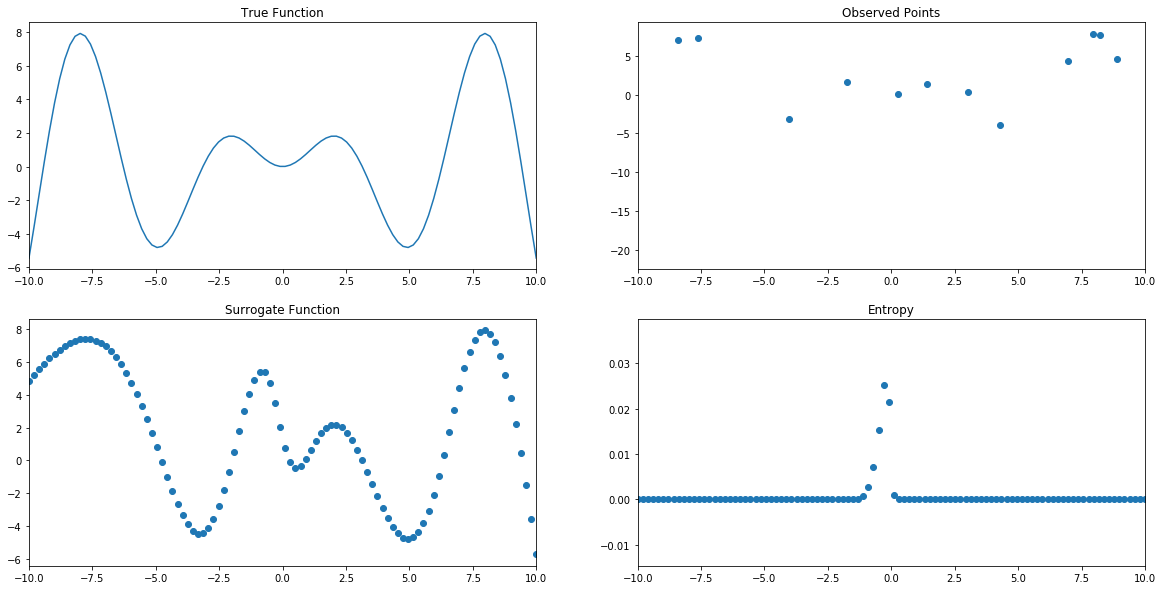

Maximum found [7.9472384] 7.912706


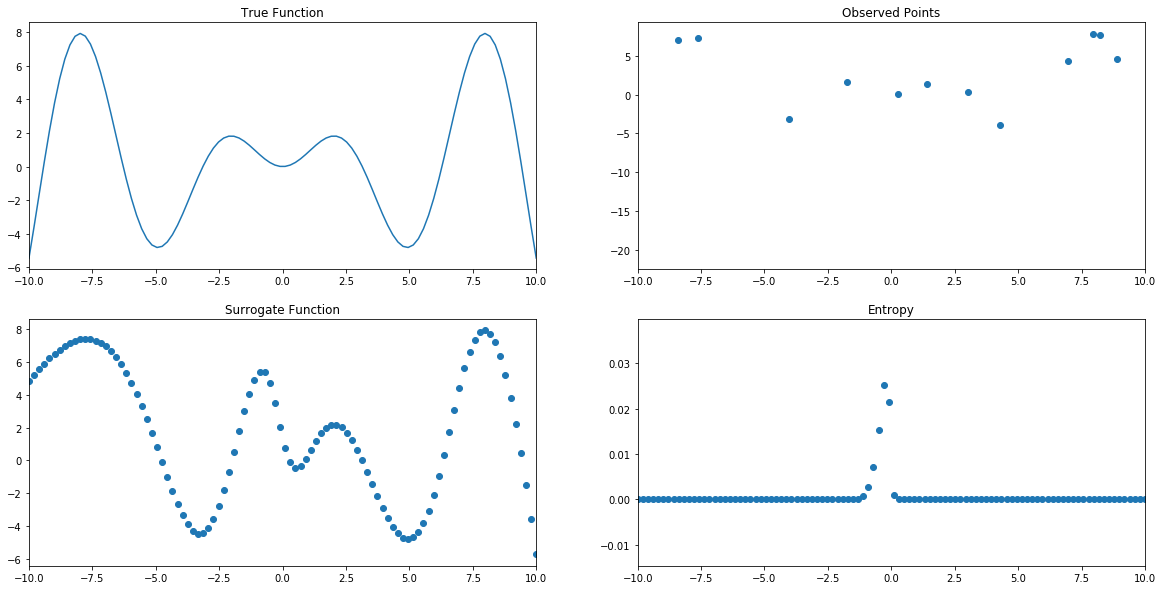

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython import display
display.clear_output(wait=True)
fig, ((true, obs), (surr, entr)),  = plt.subplots(2, 2, figsize=(20, 10))

MINI = -10
MAXI = 10
true.set_xlim([MINI, MAXI])
obs.set_xlim([MINI, MAXI])
surr.set_xlim([MINI, MAXI])
entr.set_xlim([MINI, MAXI])

true_x = np.linspace(MINI, MAXI, 100)



def plot_ob_sur_ent():
    obs.cla()
    surr.cla()
    entr.cla()
    
    obs.set_xlim([MINI, MAXI])
    surr.set_xlim([MINI, MAXI])
    entr.set_xlim([MINI, MAXI])
    obs.set_title("Observed Points")
    surr.set_title("Surrogate Function")
    entr.set_title("Entropy")


    ys = []
    es = []
    for tx in true_x:
        y, ent = Nopt.predict(np.array([[tx]]))
        ys.append(y)
        es.append(ent)
        
    display.clear_output(wait=True)

    X = np.array(Nopt.N_samples).reshape(-1)
    obs.scatter(X, Nopt.M_samples)
    surr.scatter(true_x, ys)
    entr.scatter(true_x, es)
    display.display(fig)

    

true.set_title("True Function")
obs.set_title("Observed Points")
surr.set_title("Surrogate Function")
entr.set_title("Entropy")

true_y = black_box_function(true_x)

true.plot(true_x, true_y)


Nopt.forget()
INIT = 4
for _ in range(INIT):
    Nopt.sample(verbose=False)

#for s in Nopt.N_samples:
#    v, ent = Nopt.predict([s])
#    print(ent)

Nopt.fit(10000)

#for s in Nopt.N_samples:
#    v, ent = Nopt.predict([s])
#    print(ent)


plot_ob_sur_ent()
ITERS = 10
while ITERS > 0:
    sugg, _, _ = Nopt.optimize()
    Nopt.sample(sugg, verbose=False)
    Nopt.fit(4000)
    plot_ob_sur_ent()
    time.sleep(1)

    
    ITERS -= 1

print("Maximum found", Nopt.N_samples[np.argmax(Nopt.M_samples)], max(Nopt.M_samples))